# **AIML CA2 Assignment - Part B (Time-Series Forecasting)**
**Name**: JEROME LOKE  
**Student ID**: P2510707  
**Class**: DAAA/FT/1B/01  

---

### **Tasks, and how I fulfilled them**
##### → _"Evaluate model performance and tune its hyperparameters to maximize the accuracy for training data and testing data predictions. "_

##### → _"Use validation and test data properly."_
  
### NOTE
* Avoid double differencing
  * Do either manual differencing or set d > 0 in ARIMA, not both.
* Tune hyperparameters using validation data only
  * Training → Validation → Test (test set used once at the end).
* Include interpretation for residual diagnostics
  * Briefly state whether residuals resemble white noise.
* Use consistent evaluation metrics
  * Stick to the same 2–3 metrics (e.g. RMSE, MAE) across all models and splits.
* Clearly explain the 60-month forecast procedure
  * State that the final model is refit on the full dataset before forecasting.

### **Machine Learning Workflow**
1. EDA
2. Preprocessing & Feature Engineering
3. Modelling & Evaluation
4. Model Improvement

---

### Import Libraries

In [35]:
# Data Analysis
import pandas as pd

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Timeseries
import random
from statsmodels.tsa.stattools import adfuller

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

---

## **STAGE 1: EDA (Exploratory Data Analysis)**
* **Preview Dataset**: Display first 5 rows to understand its structure.
* **Handle Time Index**: Convert date column to DatetimeIndex, set correct monthly frequency, check for missing months

### Load & Preview Dataset

In [36]:
df = pd.read_csv("./CA2-datasets/CA2-Energy-Consumption-Data.csv")

# handle time index
df["DATE"] = pd.to_datetime(df["DATE"], format="%d/%m/%Y", errors="coerce") # convert date column to DatetimeIndex
df["DATE"].asfreq("MS") # set correct monthly frequency
df.set_index("DATE", inplace=True)

df.head()

,Gas Consumption (tons),Electricity Consumption (MWh),Water Consumption (tons)
DATE,,,
1990-01-01,18.0,725.1,548.8
1990-02-01,15.8,706.7,640.7
1990-03-01,17.3,624.5,511.1
1990-04-01,18.9,574.7,515.3
1990-05-01,22.0,553.2,488.4


### Time Domain Analysis

Plotting
* Gas consumption over time

* Electricity consumption over time

* Water consumption over time


To get a better idea of overall trend, seasonality, and sudden spikes or drops.

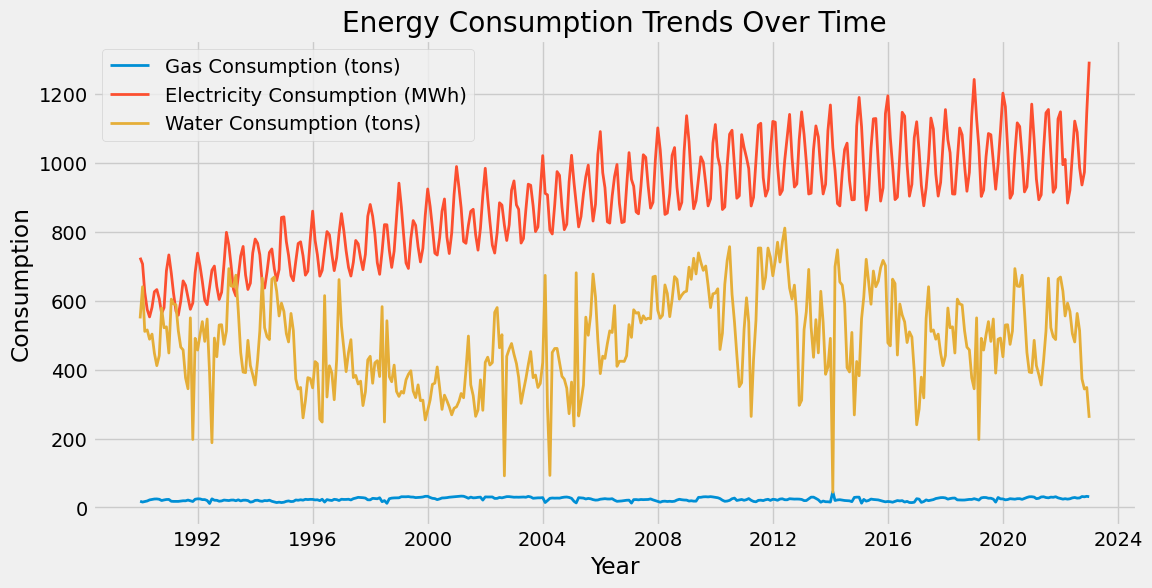

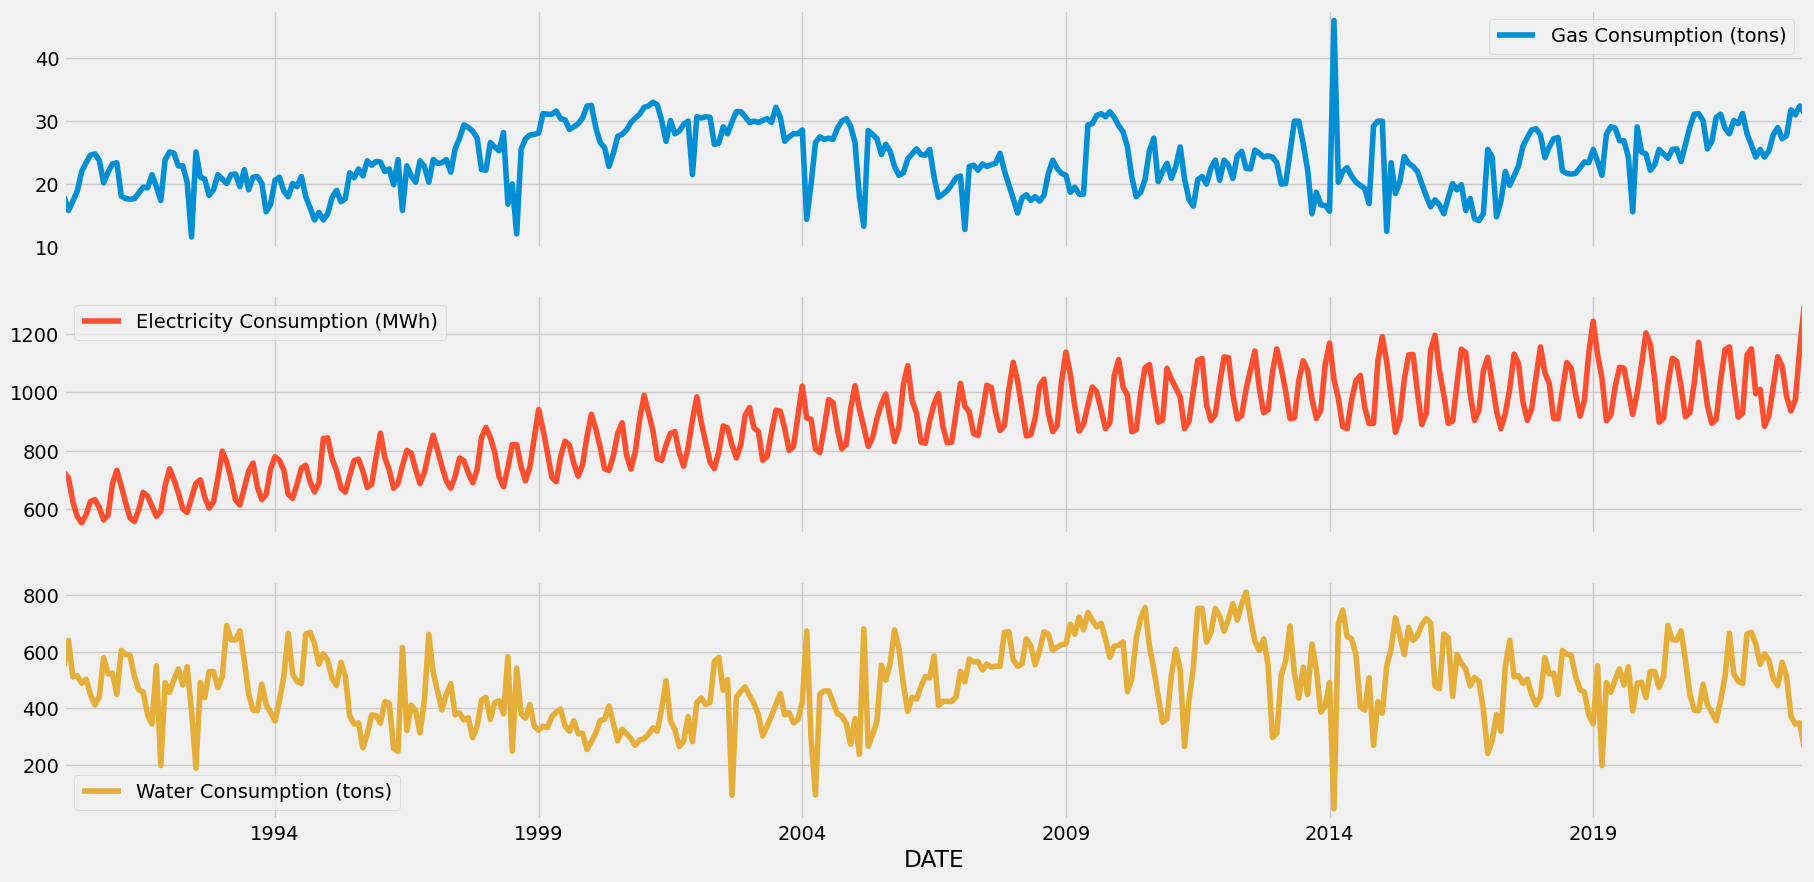

In [37]:
plt.figure(figsize=(12, 6))

# plot each energy type
plt.plot(df.index, df['Gas Consumption (tons)'], label='Gas Consumption (tons)', linewidth=2)
plt.plot(df.index, df['Electricity Consumption (MWh)'], label='Electricity Consumption (MWh)', linewidth=2)
plt.plot(df.index, df['Water Consumption (tons)'], label='Water Consumption (tons)', linewidth=2)

# style
plt.xlabel("Year")
plt.ylabel("Consumption")
plt.title("Energy Consumption Trends Over Time")
plt.grid(True)
plt.legend()
plt.show()

# plotting each on its own
df.plot(subplots=True, figsize=(20, 10))
plt.show()

### Stationarity Analysis

#### Visual Inspection of Mean and Variance
- bla bla bla

#### Augmented Dickey-Fuller (ADF) Test

### Autocorrelation Analysis

#### ACF Plot
Identify MA behaviour (q)

#### PACF Plot
Identify AR behaviour (p)

#### Why do Lags matter in consumption data + implementing lags (?)
Find out

---

## **STAGE 2: Preprocessing & Feature Engineering**

### Handle Missing Values

### Stationarity Transform: First-Order differencing, Seasonal differencing, Box-Cox transform
Re-run ADF Test to compare data before VS after transforming.

#### First-Order differencing

#### Box-Cox transform
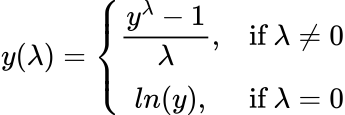

- justify why box cox usually better(?) define better than normal log transform

### Scaling (optional, compare with/without results to justify)
what scalers? is log-transform counted? minmax/std?

---

## **STAGE 3: Modelling & Evaluation**

### Build ARIMA

#### Gas Consumption (tons)

#### Water Consumption (tons)

#### Electricity Consumption (kWh)

### Hyperparameter Tuning 
ARIMA(p, d, q) - explain how i found best p d q  
GridSearchCV?  
RMSE/MAE?  
Select best model per utility (best for grid and rmse/mae respectively. explore other methods)

### Model Diagnostics
Residual plots
Residual ACF
Ljung–Box test (optional)

Check: Residuals ≈ white noise

#### Residual ACF

#### Ljung-Box Test

#### Visual Evaluation
Plot:
- Actual vs predicted (train, validation, test)
- Forecast with confidence intervals

---

## **STAGE 4: Model Improvement**
Compare ARIMA vs:
1. Naive forecast
2. Simple moving average

3. Upgrade to SARIMA, explain Seasonal (P, D, Q, s)  
  a. Seasonal ARIMA (if seasonality exists)


Model refinement
- Adjust differencing
- Remove unnecessary AR or MA terms

Trade-off between:
1. Complexity
2. Interpretability
3. Overfitting

Final model justification  
Why chosen model performs best  
Why others underperform

### 